<a href="https://colab.research.google.com/github/ChavesZay/PythonPandas-CursoAlura/blob/main/Identificando_y_excluyendo_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reporte de Análisis VIII

## Identificando y excluyendo Outliers (datos que no tienen sentido o estan malos, erroneos)

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(14,6))

In [2]:
datos=pd.read_csv('alquiler_residencial.csv',sep=';')
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,42.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,53.33,Departamento
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,16.67,Departamento
4,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,26.00,Departamento
5,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,21.43,Departamento
8,Departamento,San Borja,3,1,1,90,1500.0,455.0,14.0,16.67,Departamento
9,Departamento,San Borja,1,0,1,40,2000.0,561.0,50.0,50.00,Departamento


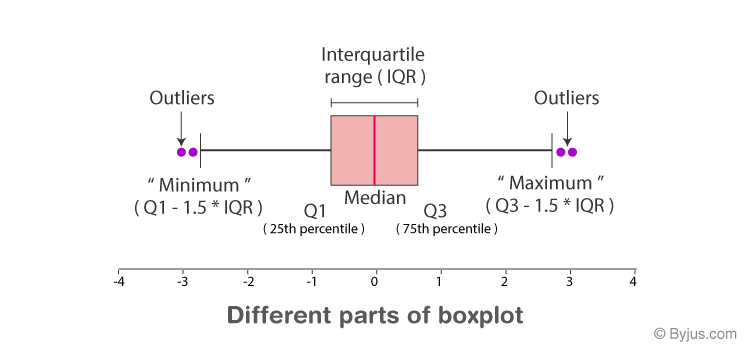

Un box plot, también conocido como diagrama de caja y bigotes, es una representación gráfica que muestra la distribución de un conjunto de datos a través de sus cuartiles.

<Axes: >

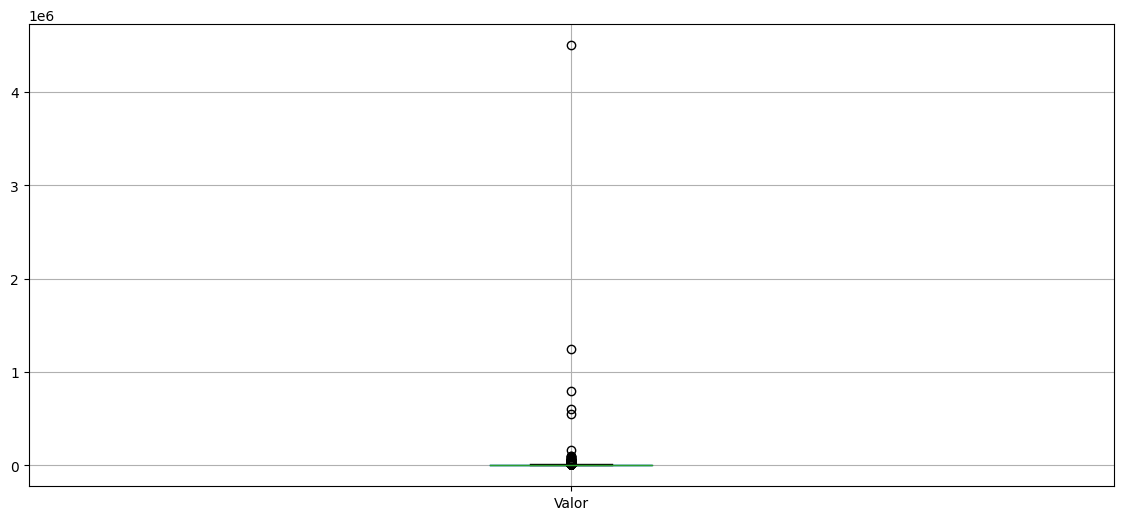

In [3]:
datos.boxplot(['Valor']) #Parametro campo contable

In [6]:
datos[datos['Valor']>=500000] #Datos outliers

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
7731,Departamento,Ate,1,1,0,65,600000.0,980.0,120.0,9230.77,Departamento
10774,Casa en condominio,Callao,4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12822,Departamento,Callao,2,2,1,150,550000.0,850.0,150.0,3666.67,Departamento
14023,Departamento,Jesús María,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Departamento
15715,Departamento,Chorrillos,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Departamento


In [7]:
valor=datos['Valor']

In [11]:
  Q1=valor.quantile(.25) #El primer cuartil representa al 25%
  Q3=valor.quantile(.75) #El primer cuartil representa al 75%
  IIQ=Q3-Q1 #Formula Q3 -Q1
  limite_inferior=Q1-1.5*IIQ
  limite_superior=Q3+1.5*IIQ


In [12]:
seleccion=(valor>=limite_inferior)&(valor<=limite_superior)

In [13]:
datos_new=datos[seleccion]

<Axes: >

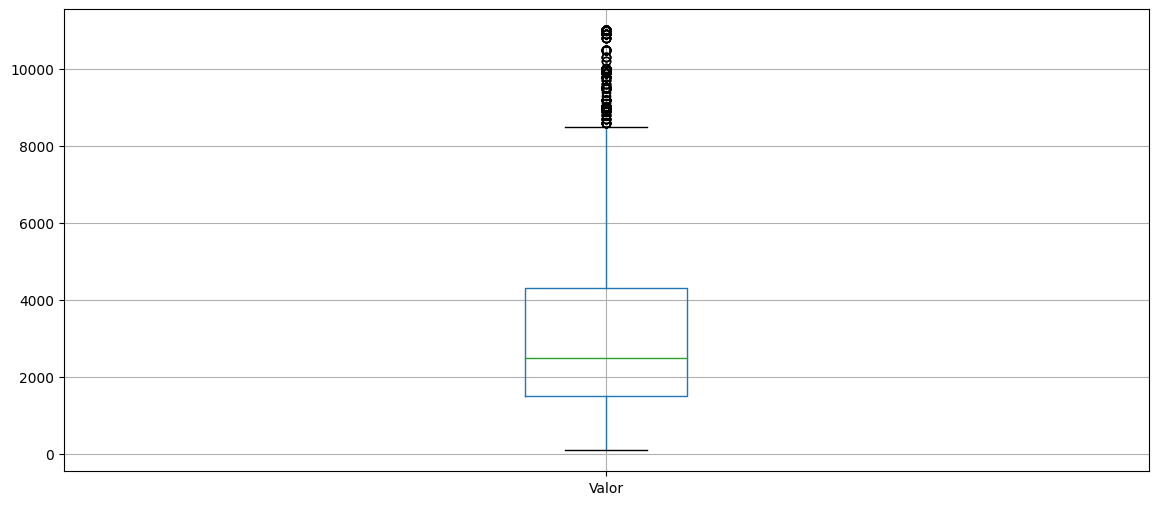

In [14]:
datos_new.boxplot('Valor')

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

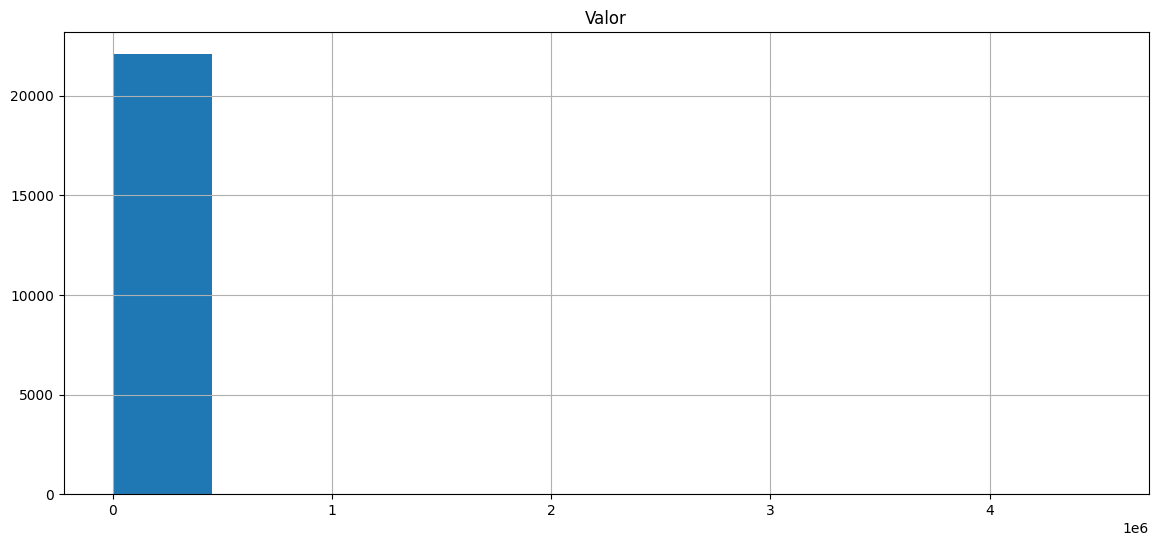

In [15]:
datos.hist(['Valor'])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

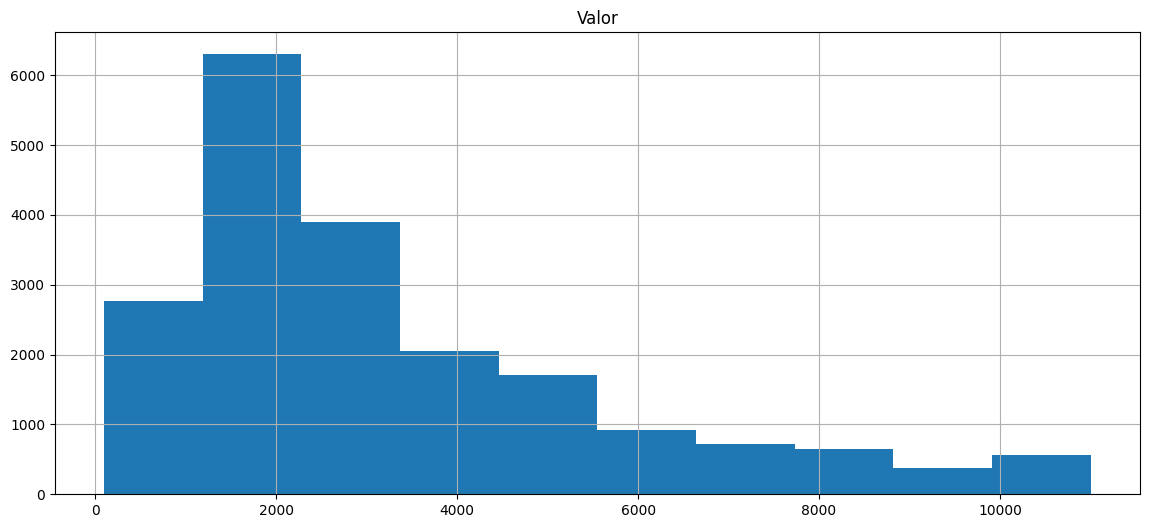

In [16]:
datos_new.hist(['Valor']) #Histograma los valores más frecuentes el los alquileres es de 2000